In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
d_full = {1994: {'actions': ['leave school', 'work as a stable boy', 'work in a kitchen', 'go back to school']},
     1997: {'actions': ['start studying geology in Leeds']},
     1999: {'actions': ['Erasmus year at the ETH', 'Field work in the Alps - the Insubric Line']},
     2001: {'actions': ['Graduate MGeolSci Leeds', 'Start PhD at Imperial College']},
     2005: {'actions': ['Graduate PhD Imperial College', 'Start working for ExxonMobil', 'Leave Exxon', 'Join Addax Petroleum']},
     2011: {'actions': ['Leave Addax', 'Join Oryx Petroleum']},
     2016: {'actions': ['Made redundant', 'Apply for hundreds of jobs', 'Appy here and abroad', 'Six months learning arabic', 'Start coding']},
     2017: {'actions': ['First coding bootcamp in Switzerland', 'Hackathon in Paris', 'Two months teaching Angular in Basel']},
     2018: {'actions': ['Internship at the state of Geneva - Chatbots', 'Pro-bono work for Tungxten', 'Hackathon in Copenhagen', 'Join Agile*']},
    }
d = {1994: {'actions': ['leave school', 'cook']},
     1997: {'actions': ['Leeds', 'barwork']},
     1999: {'actions': ['ETH', 'Insubric Line']},
     2001: {'actions': ['MGeolSci Leeds', '200 applications']},
     2005: {'actions': ['PhD Imperial College', 'ExxonMobil']},
     2011: {'actions': ['Leave Addax', 'travel']},
     2016: {'actions': ['Redundant', '100s of applications']},
     2017: {'actions': ['Bootcamp', 'Hackathon', 'Angular']},
     2018: {'actions': ['Agile*', 'Hackathon', 'Chatbots']},
    }
df = pd.DataFrame(data=d)
df_t = df.transpose()
df_t

,actions
1994,"[leave school, cook]"
1997,"[Leeds, barwork]"
1999,"[ETH, Insubric Line]"
2001,"[MGeolSci Leeds, 200 applications]"
2005,"[PhD Imperial College, ExxonMobil]"
2011,"[Leave Addax, travel]"
2016,"[Redundant, 100s of applications]"
2017,"[Bootcamp, Hackathon, Angular]"
2018,"[Agile*, Hackathon, Chatbots]"


In [5]:
df_oil = pd.read_csv('./oil_prices1960-2019.csv', index_col='Year')
df_oil.head(2)

,Opec_avgUSD_per_Barrel
Year,
2019,61.29
2018,69.52


In [6]:
df_t.index

Int64Index([1994, 1997, 1999, 2001, 2005, 2011, 2016, 2017, 2018], dtype='int64')

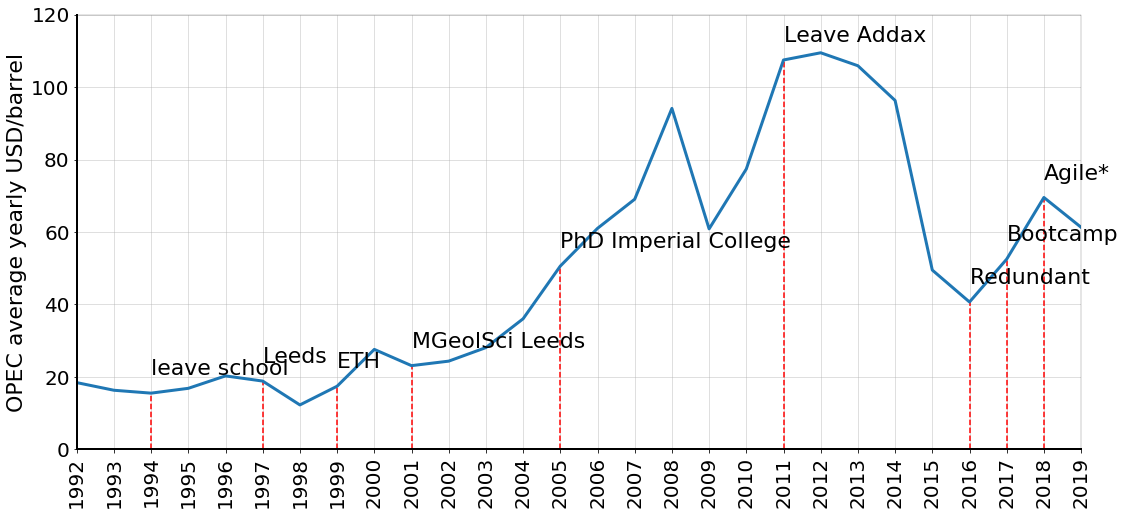

In [9]:
fig, ax = plt.subplots(figsize=(18,8), nrows=1, ncols=1)#, facecolor='#002B36')

timerange = np.arange(1992,2020,1)
xlabels = [f'{i}' for i in timerange]
pricerange = np.arange(0,140,20)

labelsize, ticksize, textsize = 22, 20, 22

ax.plot(df_oil.loc[:, 'Opec_avgUSD_per_Barrel'], linewidth=3)

#ax.set_title('Rob\'s oil price rollercoaster', fontsize=18, color='k')

ax.set_xlim(1992,2019)
ax.set_ylim(0, 120)

ax.set_xticks(timerange)
ax.set_xticklabels(labels=xlabels, rotation=90, color='k')
ax.set_yticklabels(labels=pricerange, color='k')

#ax.set_xlabel('Current Year', fontsize=labelsize, color='k')
ax.set_ylabel('OPEC average yearly USD/barrel', fontsize=labelsize, color='k')

ax.tick_params(labelsize=ticksize)

ax.grid(alpha=0.5)
for axis in ['bottom','left',]:
        ax.spines[axis].set_linewidth(2)     
        ax.spines[axis].set_color('k')

for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0.2)     
    ax.spines[axis].set_color('k')
    
for year in df_t.index:
    ax.vlines(year,0,df_oil.loc[year], color='red', linestyles='--')
    ax.text(year,
            df_oil.loc[year]+5,
            f"{df_t.loc[year, 'actions'][0]}",
            color='k',
            fontsize=textsize,
           )
    
#ax.set_facecolor('#002B36')
    
plt.savefig("./images/oil_price.png", dpi=300)
plt.show()